# Naloga 1: Kibergrad

In [620]:
import pandas as pd
import math
import numpy
from random import seed, randint
import matplotlib.pyplot as plt
import statistics
import random
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, sem
from scipy import stats

In [621]:
Kibergrad = pd.read_csv("Kibergrad.csv")

In [622]:
min(Kibergrad.dohodek)

-22166

In [623]:
max(Kibergrad.dohodek)

451887

### A naloga

**Narišite histogram dohodkov vseh družin v Kibergradu. Pri tem dohodke razdelite v enako široke razrede. Širino posameznega razreda določite v skladu s Freedman–Diaconisovim pravilom.**

Določimo število razredov v histogramu.

In [624]:
#koda vzeta s strani http://www.jtrive.com/determining-histogram-bin-width-using-the-freedman-diaconis-rule.html

def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = numpy.asarray(data, dtype=numpy.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit") #Compute the interquartile range of the data along the specified axis
    N    = data.size
    bw   = (2 * IQR) / numpy.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return result

In [625]:
#širina razreda v histogramu
freedman_diaconis(Kibergrad.dohodek, 'width')

c:\Users\gajaj\AppData\Local\Programs\Python\Python38-32\lib\site-packages\scipy\stats\_stats_py.py:3171: VisibleDeprecationWarning: use of scale='raw' is deprecated, use scale=1.0 instead
  warnings.warn(


2127.8476148224045

In [626]:
#število razredov za histogram
freedman_diaconis(Kibergrad.dohodek, 'bins')

223

Tabelo uredimo po naraščajočih se dohodkih

In [627]:
Kibergrad_urejen = Kibergrad.sort_values('dohodek').reset_index()

Histogram dohodkov vseh družin v Kibergradu

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        8.000e+00, 6.000e+00, 7.000e+00, 1.100e+01, 7.110e+02, 6.910e+02,
        9.960e+02, 1.130e+03, 1.320e+03, 1.411e+03, 1.472e+03, 1.667e+03,
        1.493e+03, 1.531e+03, 1.379e+03, 1.461e+03, 1.544e+03, 1.392e+03,
        1.442e+03, 1.455e+03, 1.300e+03, 1.232e+03, 1.208e+03, 1.312e+03,
        1.112e+03, 1.096e+03, 9.870e+02, 1.097e+03, 9.610e+02, 8.860e+02,
        8.610e+02, 7.900e+02, 7.420e+02, 6.420e+02, 5.930e+02, 6.470e+02,
        4.810e+02, 4.980e+02, 4.720e+02, 4.330e+02, 3.590e+02, 3.330e+02,
        3.420e+02, 3.020e+02, 2.880e+02, 2.600e+02, 2.250e+02, 2.420e+02,
        1.860e+02, 1.940e+02, 1.670e+02, 2.310e+02, 2.050e+02, 1.730e+02,
        1.460e+02, 1.200e+02, 1.200e+02, 1.130e+02, 1.030e+02, 7.500e+01,
        1.020e+02, 7.400e+01, 6.200e+01, 7.000e+01, 5.700e+01, 6.100e+01,
        4.100e+01, 4.900e+01, 5.000e+01, 5.600e+01, 4.200e+01, 3.500e+01,
        3.400e+01, 3.100e+01, 3.400e+0

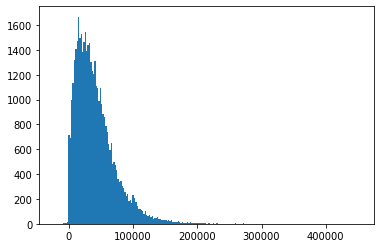

In [628]:
plt.hist(Kibergrad.dohodek, bins=223)

### B naloga

Dorišite normalno gostoto, katere pričakovana vrednost in standardni odklon
se ujemata s povprečjem in standardnim odklonom dohodka družine v Kibergradu. Kako dobro se prilega?

In [629]:
#pričakovana vrednost se ujema s povprečjem
povprecje = Kibergrad.dohodek.mean()
povprecje

41335.50704096979

In [630]:
#standardni odklon izracunamo s pomocjo funkcije .std()
standardni_odklon = Kibergrad.dohodek.std()
standardni_odklon

32037.61941788666

In [631]:
# gostota normalne porazdelitve

def normalna(x, pov, st):
    return 1/ (st*(2*math.pi)**0.5) * math.e**(-0.5*((x-pov)/st)**2)

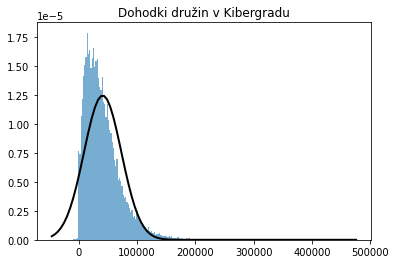

In [632]:
#koda vzeta iz strani https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/

# Plot the histogram.
plt.hist(Kibergrad.dohodek, bins=223, density=True, alpha=0.6)
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = numpy.linspace(xmin, xmax, 100)
p = normalna(x, povprecje, standardni_odklon)

  
plt.plot(x, p, 'k', linewidth=2)
title = "Dohodki družin v Kibergradu".format(povprecje, standardni_odklon)
plt.title(title)
  
plt.show()

### C naloga

Narišite kumulativno porazdelitveno funkcijo porazdelitve dohodkov družin v
Kibergradu in primerjajte s kumulativno porazdelitveno funkcijo ustrezne normalne porazdelitve. Spet komentirajte, kako dobro se prilega.

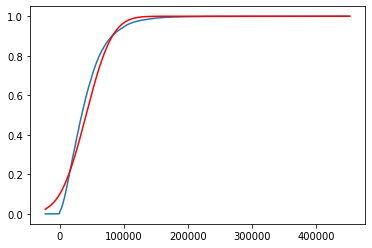

In [633]:
#koda iz strani https://www.statology.org/cdf-python/

x = numpy.sort(Kibergrad.dohodek)

#calculate CDF values
y = 1. * numpy.arange(len(Kibergrad.dohodek)) / (len(Kibergrad.dohodek) - 1)

#plot CDF
p1 = plt.plot(x, y)

#CDF za normalno porazdelitev
u = []
for i in x:
    u.append(statistics.NormalDist(povprecje, standardni_odklon).cdf(i))

p2 = plt.plot(x, u, color='r')

plt.show()

### D naloga

Narišite še primerjalni kvantilni (Q–Q) grafikon, ki porazdelitev dohodkov
družin v Kibergradu primerja z normalno porazdelitvijo

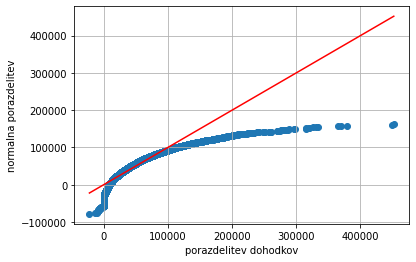

In [634]:
podatki_normalne = numpy.random.normal(povprecje,standardni_odklon,43886)
podatki_normalne.sort()

podatki_dohodkov = Kibergrad_urejen.dohodek

plt.scatter(podatki_dohodkov,podatki_normalne)
plt.plot([min(podatki_dohodkov),max(podatki_dohodkov)],[min(podatki_dohodkov),max(podatki_dohodkov)],color="red")
plt.xlabel("porazdelitev dohodkov")
plt.ylabel("normalna porazdelitev")
plt.grid()
plt.show()

### E naloga

Vzemite 1000 enostavnih slučajnih vzorcev velikosti 400 in narišite histogram
vzorčnih povprečij dohodkov družin

In [635]:
#generiramo povprečja vzorcev
seznam_povprecij = []
for j in range(1000):
    seznam_dohodkov = []
    for i in range(0,400):
        n = random.randint(0,43885)
        d = Kibergrad.dohodek[n]
        seznam_dohodkov.append(d)
    seznam_povprecij.append(sum(seznam_dohodkov) / len(seznam_dohodkov))

In [636]:
#določimo število razredov v histogramu
freedman_diaconis(seznam_povprecij, "bins")

c:\Users\gajaj\AppData\Local\Programs\Python\Python38-32\lib\site-packages\scipy\stats\_stats_py.py:3171: VisibleDeprecationWarning: use of scale='raw' is deprecated, use scale=1.0 instead
  warnings.warn(


28

(array([  1.,   0.,   2.,   6.,  11.,  22.,  40.,  79., 103., 115., 124.,
        126., 130., 109.,  70.,  32.,  17.,   7.,   5.,   0.,   0.,   1.]),
 array([35204.91      , 35765.95488636, 36326.99977273, 36888.04465909,
        37449.08954545, 38010.13443182, 38571.17931818, 39132.22420455,
        39693.26909091, 40254.31397727, 40815.35886364, 41376.40375   ,
        41937.44863636, 42498.49352273, 43059.53840909, 43620.58329545,
        44181.62818182, 44742.67306818, 45303.71795455, 45864.76284091,
        46425.80772727, 46986.85261364, 47547.8975    ]),
 <BarContainer object of 22 artists>)

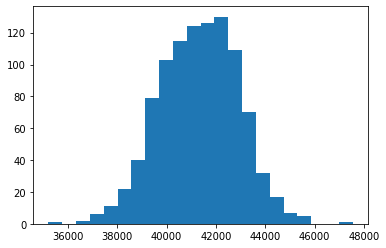

In [637]:
plt.hist(seznam_povprecij, bins=22)

### F naloga

Dorišite normalno gostoto, katere pričakovana vrednost se ujema s povprečnim
dohodkom na družino v Kibergradu, standardni odklon pa s standardno napako
za enostavni slučajni vzorec velikosti 400. Komentirajte, kako dobro se prilega.

In [638]:
seznam_dohodkov = []
for i in range(0,400):
    n = random.randint(0,43885)
    d = Kibergrad.dohodek[n]
    seznam_dohodkov.append(d)

In [639]:
# pričakovana vrednost = povprečje dohodkov v celotni populaciji
pričakovana_vrednost = sum(Kibergrad.dohodek)/len(Kibergrad.dohodek)
#pričakovana_vrednost = numpy.mean(seznam_dohodkov)
pričakovana_vrednost

41335.50704096979

In [640]:
#standardni odklon = SE za enostavni slučajni vzorec velikostni 400

se = sem(numpy.array(seznam_dohodkov))
se

1515.017726853948

In [641]:
#drugi način za zračunat se
numpy.std(seznam_dohodkov, ddof=1) / numpy.sqrt(numpy.size(seznam_dohodkov))

1515.017726853948

In [642]:
#tretji način za izračun se
N = 43886
n = 400
se = numpy.sqrt((N-n)/(N-1) * numpy.std(seznam_dohodkov)**2/n)
se

1506.2284487368274

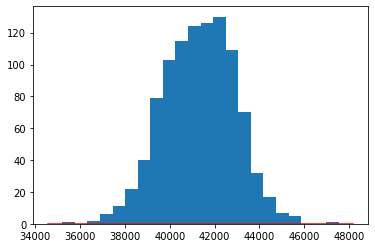

In [643]:
# Plot the histogram.

plt.hist(seznam_povprecij, bins=22)
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = numpy.linspace(xmin, xmax, 100)

plt.plot(x, norm.pdf(x, pričakovana_vrednost, se), color='r')
  
plt.show()

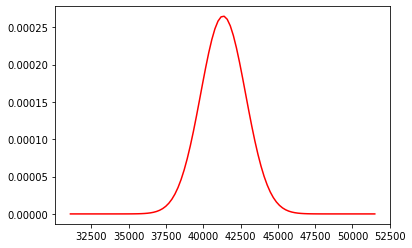

In [644]:
#samo graf normalne porazdelitve
x = numpy.linspace(31100, 51500, 100)
plt.plot(x, norm.pdf(x, pričakovana_vrednost, se), color='r')

### G naloga

Za vzorčna povprečja podobno kot prej narišite še kumulativno porazdelitveno
funkcijo in primerjalni kvantilni grafikon ter primerjajte z normalno porazdelitvijo. Komentirajte prileganje.

KUMULATIVNA PORAZDELITVENA FUNKCIJA

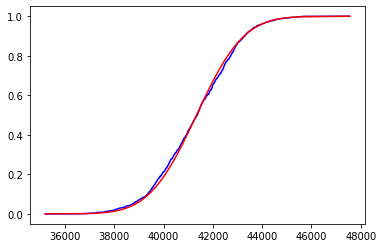

In [645]:
#KUMULATIVNA PORAZDELITVENA FUNKCIJA

#plot CDF
#sort data
from turtle import color


x = numpy.sort(seznam_povprecij)

#calculate CDF values
y = 1. * numpy.arange(len(seznam_povprecij)) / (len(seznam_povprecij) - 1)

#plot CDF
plt.plot(x, y, color='b')

#KUMULATIVNA ZA NORMANO
u = []
for i in x:
    u.append(statistics.NormalDist(pričakovana_vrednost, se).cdf(i))

p2 = plt.plot(x, u, color='r')



KVANTILNI GRAFIKON

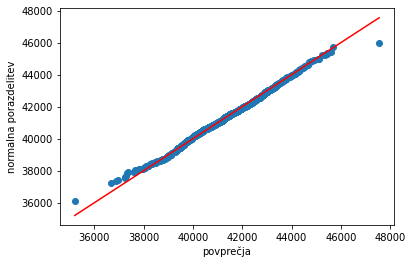

In [646]:
podatki_normalne = numpy.random.normal(pričakovana_vrednost,se,1000)
podatki_normalne.sort()

seznam_povprecij.sort()

plt.scatter(seznam_povprecij,podatki_normalne)
plt.plot([min(seznam_povprecij),max(seznam_povprecij)],[min(seznam_povprecij),max(seznam_povprecij)],color="red")

plt.xlabel("povprečja")
plt.ylabel("normalna porazdelitev")
plt.show()